<a href="https://colab.research.google.com/github/Anushka557/CodSoft-Internship/blob/main/copy_of_task_1_codsoft_anushka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab  import files
uploaded = files.upload()

Saving Titanic-Dataset (1).csv to Titanic-Dataset (1).csv


In [ ]:
# Dataset First Look
import io
import pandas as pd
titanic_df = pd.read_csv((io.BytesIO(uploaded['Titanic-Dataset (1).csv'])))
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_df.shape

(891, 12)

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

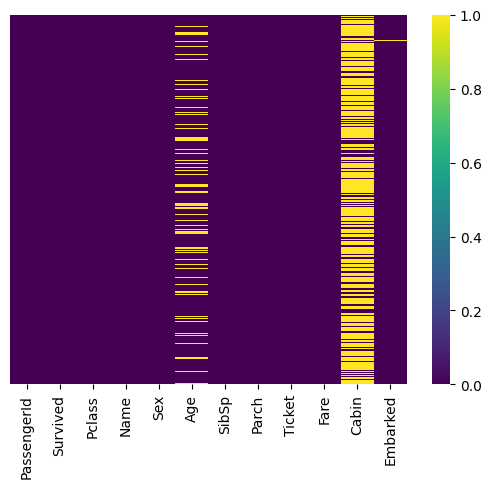

In [ ]:
# Visualising the missing values using heatmap
import seaborn as sns
sns.heatmap(titanic_df.isnull(),yticklabels=False,cmap='viridis')

In [ ]:

if 'Embarked' in titanic_df.columns:
    ports = pd.get_dummies(titanic_df['Embarked'], prefix='Embarked')
    titanic_df = pd.concat([titanic_df, ports], axis=1)
    titanic_df.drop(['Embarked'], axis=1, inplace=True)
else:
    print("Embarked column not found in the DataFrame. It might have been removed previously.")

# Convert 'Sex' column to numerical values
ports.head()

,Embarked_C,Embarked_Q,Embarked_S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True


In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


In [ ]:
titanic_df.Sex=titanic_df.Sex.map({'male':0, 'female':1})

In [ ]:
titanic_df['Sex']

,Sex
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
886,NaN
887,NaN
888,NaN
889,NaN


In [ ]:
# Splitting the data
Y= titanic_df.Survived.copy()
X= titanic_df.drop(['Survived'],axis=1)

In [ ]:
# dropping the attributed which does not have a stronger coorealation to affect the outcome
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
# Check if columns exist in X before dropping
columns_to_drop = [col for col in columns_to_drop if col in X.columns]
X.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
for columns in X.select_dtypes(include=np.number).columns:
    X[columns].fillna(X[columns].mean(), inplace=True)

<ipython-input-32-40c9b4f52a81>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[columns].fillna(X[columns].mean(), inplace=True)


In [ ]:
for column in X.select_dtypes(include=['object']).columns:
    X[column].fillna(X[column].mode()[0], inplace=True)

In [ ]:
X.isnull().sum()

,0
Pclass,0
Sex,891
Age,0
SibSp,0
Parch,0
Fare,0
Embarked_C,0
Embarked_Q,0
Embarked_S,0


In [ ]:
X.Age.fillna(X.Age.mean(),inplace=True)

<ipython-input-35-d9dd57ff4da2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X.Age.fillna(X.Age.mean(),inplace=True)


In [ ]:
X.isnull().values.any()

np.True_

In [ ]:
#Import libraries for model building
from sklearn.model_selection import train_test_split
#splitting the data to train our model and test its accuracy
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [ ]:
# Import Regression libraries for model building
from sklearn.linear_model import LogisticRegression

#Initialise it to a name
model = LogisticRegression()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# ... (your existing code for data loading and preprocessing) ...

# Splitting the data
Y = titanic_df.Survived.copy()
X = titanic_df.drop(['Survived'], axis=1)

# dropping the attributed which does not have a stronger coorealation to affect the outcome
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
# Check if columns exist in X before dropping
columns_to_drop = [col for col in columns_to_drop if col in X.columns]
X.drop(columns_to_drop, axis=1, inplace=True)

# Convert 'Sex' column to numerical values
X.Sex = X.Sex.map({'male': 0, 'female': 1})

#splitting the data to train our model and test its accuracy
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='most_frequent') # Use most frequent for both numerical and categorical
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Initialise and train the model
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Sex']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Sex']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# dropping the attributed which does not have a stronger coorealation to affect the outcome
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
# Check if columns exist in X before dropping
columns_to_drop = [col for col in columns_to_drop if col in X.columns]
X.drop(columns_to_drop, axis=1, inplace=True)
# Impute missing values for all numerical features with their mean
for column in X.select_dtypes(include=np.number).columns:
    X[column].fillna(X[column].mean(), inplace=True)
# Impute missing values for categorical features with their mode
for column in X.select_dtypes(include=['object']).columns:
    X[column].fillna(X[column].mode()[0], inplace=True)

<ipython-input-42-45594c937e36>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[column].fillna(X[column].mean(), inplace=True)


In [ ]:
#Import libraries for model building
from sklearn.model_selection import train_test_split
#splitting the data to train our model and test its accuracy
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

# Import Regression libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer # Import SimpleImputer

#Initialise it to a name
model = LogisticRegression()

# Impute missing values before fitting the model
imputer = SimpleImputer(strategy='most_frequent')  # or strategy='mean' if appropriate
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Fit the model to the training data
model.fit(X_train, Y_train) # This line is crucial

# Now you can calculate the score
model.score(X_test, Y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Sex']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Sex']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7318435754189944

In [ ]:
# Predict on the model
Y_pred_test= model.predict(X_test)
Y_pred_test

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0])

In [ ]:
Y_test

,Survived
725,0
861,0
528,0
46,0
627,1
...,...
809,1
305,1
538,0
825,0


In [ ]:
# import metrices to check accuracy
from sklearn.metrics import accuracy_score
print('Model accuracy score:{0:0.4f}'. format(accuracy_score(Y_test, Y_pred_test)))

Model accuracy score:0.7318
